## Fees research

Refer to this document: https://hackmd.io/mxBUtD7rQrqHhK3l-5jw5g

## Yearly simulations fixed minimal fee

Minimal fixed fee in Liquity is 0.5% and can grow up to 5% depending on protocol state

Starting with 10m dollars volume and going up to \$150m volume with 10m step

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.display_functions import display

from notebooks.ebtc_research.generate_data import get_tables

TABLE_HEADERS = ["Volume in $", "Projected Yearly Revenue in $", "Fee"]
min_fee_revenues, min_fee_revenues_double, random_fee_revenues, random_fee_revenues_double, volumes = get_tables()

dataframe = pd.DataFrame(data=[*min_fee_revenues, *min_fee_revenues_double], columns=TABLE_HEADERS)
display(dataframe)

,Volume in $,Projected Yearly Revenue in $,Fee
0,1000000.0000,5000.0,0.5%
1,2000000.0000,10000.0,0.5%
2,3000000.0000,15000.0,0.5%
3,4000000.0000,20000.0,0.5%
4,5000000.0000,25000.0,0.5%
5,6000000.0000,30000.0,0.5%
6,7000000.0000,35000.0,0.5%
7,8000000.0000,40000.0,0.5%
8,9000000.0000,45000.0,0.5%
9,10000000.0000,50000.0,0.5%


## Yearly simulations fixed RANDOMIZED fee

This is simulation ran against different fee values, starting from 0.5% and up to 5%.
- Fees are randomized, but 0.5% has more probability to happen
- 5% is less likely to happen

In [26]:
dataframe = pd.DataFrame(data=[*random_fee_revenues, *random_fee_revenues_double], columns=TABLE_HEADERS)
display(dataframe)

,Volume in $,Projected Yearly Revenue in $,Fee
0,1000000.0000,9000.0,0.9000000000000001%
1,2000000.0000,12000.0,0.6%
2,3000000.0000,150000.0,5.0%
3,4000000.0000,24000.0,0.6%
4,5000000.0000,190000.0,3.8%
5,6000000.0000,294000.0,4.8999999999999995%
6,7000000.0000,91000.0,1.3%
7,8000000.0000,88000.0,1.0999999999999999%
8,9000000.0000,81000.0,0.9000000000000001%
9,10000000.0000,100000.0,1.0%


## Visualising projected revenues for both normal and double fees scenarios

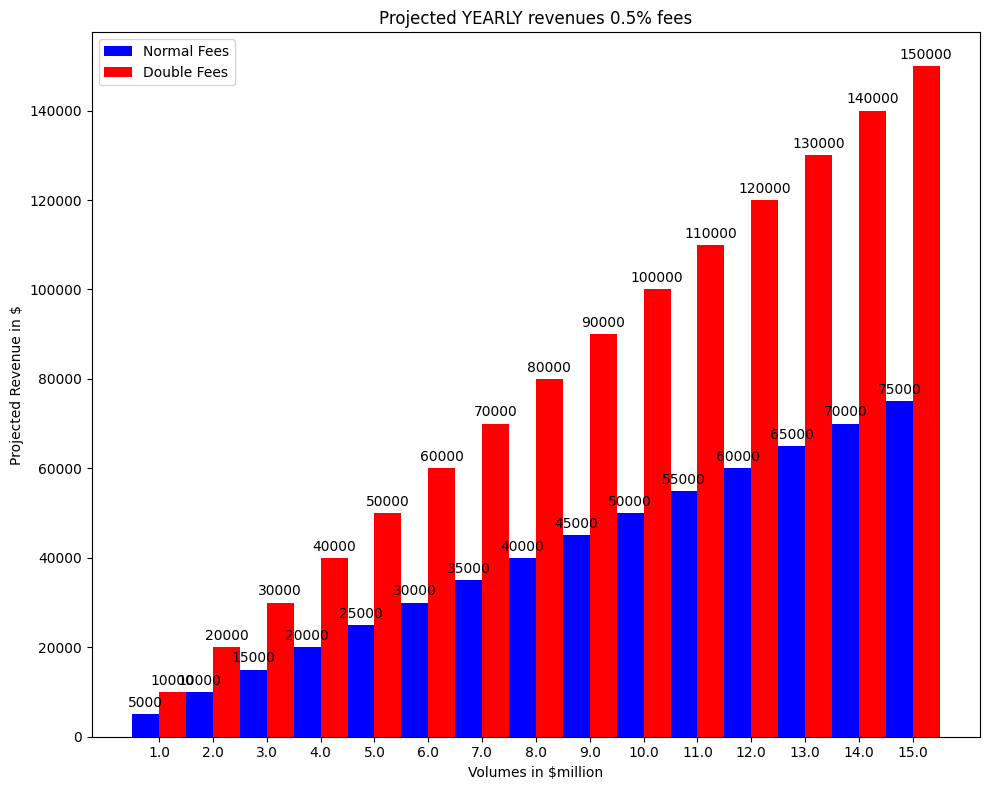

In [27]:
revenues = [int(item[1]) for item in min_fee_revenues]
revenues_double_fees = [int(item[1]) for item in min_fee_revenues_double]
volume_labels = list(map(lambda i: i / 1000000, volumes))

x = np.arange(len(volume_labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
rects1 = ax.bar(x - width/2, revenues, width, label='Normal Fees', color="blue")
rects2 = ax.bar(x + width/2, revenues_double_fees, width, label='Double Fees', color="red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Projected Revenue in $')
ax.set_xlabel('Volumes in $million')
ax.set_title('Projected YEARLY revenues 0.5% fees')
ax.set_xticks(x, volume_labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

## Visualising projected revenues for RANDOM fees, both normal and double fees scenarios

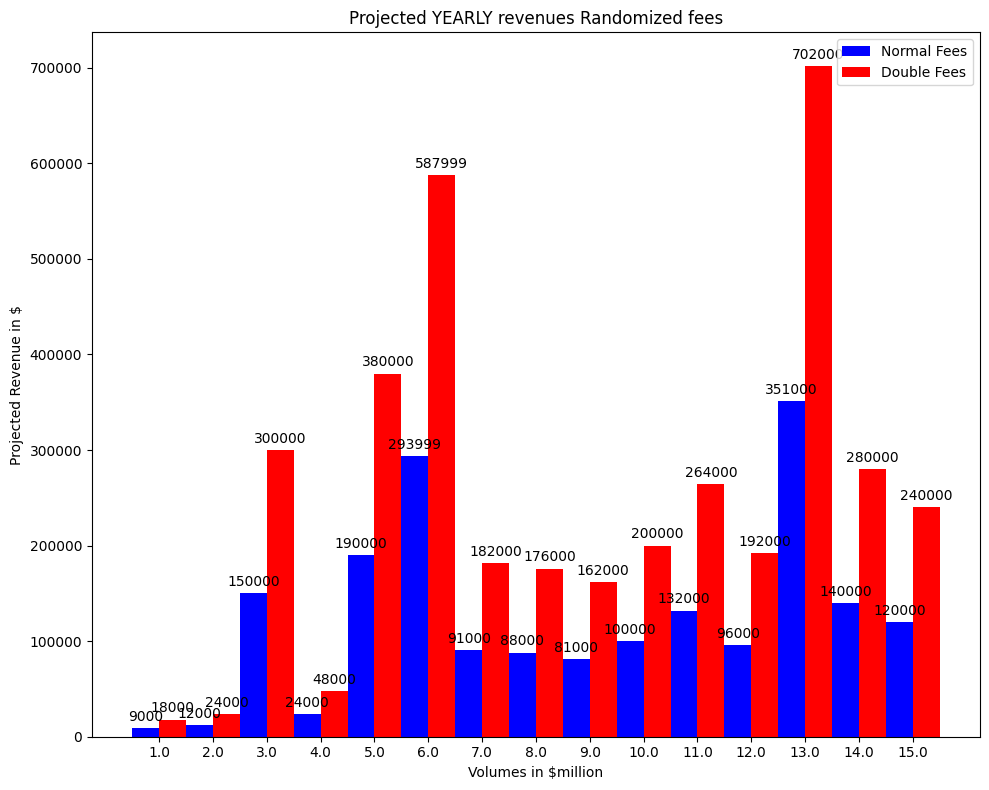

In [28]:
revenues = [int(item[1]) for item in random_fee_revenues]
revenues_double_fees = [int(item[1]) for item in random_fee_revenues_double]
volume_labels = list(map(lambda i: i / 1000000, volumes))

x = np.arange(len(volume_labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
rects1 = ax.bar(x - width/2, revenues, width, label='Normal Fees', color="blue")
rects2 = ax.bar(x + width/2, revenues_double_fees, width, label='Double Fees', color="red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Projected Revenue in $')
ax.set_xlabel('Volumes in $million')
ax.set_title('Projected YEARLY revenues Randomized fees')
ax.set_xticks(x, volume_labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()